<h1>DecisionTree</h1>
<img src="img/decisiontree_visual.PNG" width="450px"></img>
<br>
<div>
  <ul>
   <p style="font-weight:bold"><span style="font-size:20px">분류/회귀</span> 문제에 널리 사용</p>
   <p>결정에 다다르기 위해 <span style="color:blue">예</span>/<span style="color:red">아니오</span> 질문을 이어 나가며 학습( 스무고개와 유사 )</p>
  <p style="">가장 상위에 있는 node를 <span style="color:blue">Root node</span>라고 함</p>
  <p style="">가장 하위에 있는 node를 <span style="color:blue">Leaf node</span>라고 함</p>
  <p style="">target이 1개이면 <span style="color:red">pure node</span></p>
  </ul>
</div>

<span style="color:red; font-size:20px"> 장점 </span>
```
1. 분석 과정을 직관적으로 이해하기 쉬워 설명력이 좋음
2. IF-THEN 규칙으로 나무 생성 가능
3. SQL문을 통해 표현 가능
4. 데이터 스케일에 영향을 받지 않음
```
<span style="color:blue; font-size:20px"> 단점 </span>
```
1. 연속형 변수는 적당하지 않음
2. 시계열 분석이 어려움
3. 과대적합의 경향이 존재 -> 앙상블 방법 사용하여 보완
```
<span style="font-size:20px"> 과정 </span>
```
1. 의사결정나무 형성 ( 분리기준 및 정지규칙에 따라 )
    - 분리기준 : 목표변수의 분포를 구별해주는 기준 ( 이지분리 : CART 사용 / 다지분리 : C4.5, CHAID 사용 )
    - 정지규칙 : 불순도가 떨어지지 않는 경우 분리 중단 ( 지니지수, 엔트로피, 카이제곱 ...)
2. 가지치기
3. 최적 Tree 분류
4. 해석 및 예측
```
<span style="color:red">모든 리프노드가 순수할 때까지 진행하면 과적합 발생</span>
- 사전가지치지 ( 트리생성을 일찍 중단 -> sklearn 지원 )
- 사후가지치기 ( 트리 생성 후 노드 삭제 혹은 병합 )
```
1. CART
    - 검증용 데이터로 가지치기
    - 지니지수 : 불확실성 의미 0에 가까울수록 좋음
2. C4.5 
    - 범주 수 만큼 분리 가능
    - 엔트로피 사용
```


|     | CART | C4.5 | CHAID |
|-----|------|------|-------|
|분류나무|  O  |  O  |  O  |
|회귀나무|  O  |  O  |  X  |
|예측|범주 및 수치|범주 및 수치|범주|
|불순도알고리즘|지니지수|엔트로피|카이제곱|
|분리|이지|다지|다지|
|정지규칙|가지치기|가지치기|O|
|교차검증|검증데이터로 검증| 학습만 사용|X|

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

from sklearn.model_selection import train_test_split

In [20]:
# 분류
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [21]:
# import data
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify = data.target, random_state = 42)

# train tree
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

# tree.score는 결정계수 -> 종속변수의 분산 중에서 독립변수로 설명되는 비율 / 모델이 타겟변수를 얼마나 잘 예측,설명하는지 평가지표의 하나
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


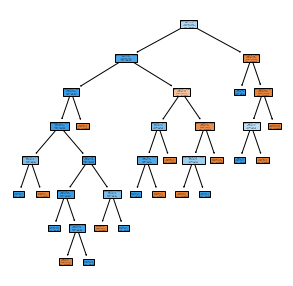

In [23]:
# 트리 시각화
fig = plt.figure(figsize=(5,5))
_ = plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)

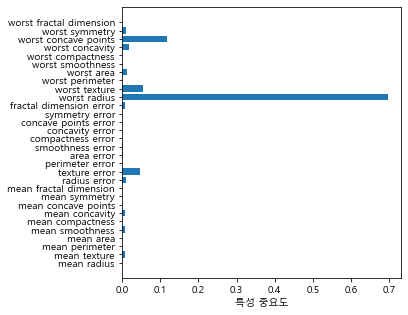

In [30]:
"""
특성 중요도(feature importance)
0과 1 사이의 숫자로 
0은 특성에 대해 전혀 사용되지않았다 / 1은 완벽하게 타겟 클래스를 예측했다
회귀 / 분류 모두 같은 방식으로 확인 가능
"""
# print(tree.feature_importances_)

def feature(model):
    plt.figure(figsize=(5,5))
    features = data.data.shape[1]
    plt.barh(np.arange(features), model.feature_importances_, align='center')
    plt.yticks(np.arange(features), data.feature_names)
    plt.xlabel("특성 중요도")
    plt.show()

feature(tree)

In [13]:
# 회귀
#import packages
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [14]:
# import data
data = load_diabetes()

data_x = pd.DataFrame(data['data'], columns=data['feature_names'])
data_y = pd.DataFrame(data['target'], columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)

# train tree
tree = DecisionTreeRegressor(random_state = 1, min_samples_leaf=35, max_depth=10)

tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train, sample_weight=None)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test, sample_weight=None)))

훈련 세트 정확도: 0.454
테스트 세트 정확도: 0.391
